In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from embedding_functions import *
from experiment_setup import *
from functions_for_bootstrap import *
import numba as nb
from scipy.stats import wasserstein_distance
from tqdm import tqdm
import random

### Use the test with $M$ samples drawn from the same distribution - compared to one bootstrap from itself each time

In [2]:
# Network generation --------------------------------------------------------
random.seed(10)
np.random.seed(10)

n = 1000  # number of nodes
K = 4   # number of node communities

# Community labels
tau = np.random.choice(K, n) # order tau would make the nice blocks
tau = np.sort(tau)
# print(tau)

# Generate stochastic block model (SBM) B matrix
"""Just one observation is required"""
B_list = []

B_symm = np.array([[0.7, 0.4, 0.2, 0.5],
                   [0.4, 0.6, 0.3, 0.2],
                   [0.2, 0.3, 0.7, 0.4],
                   [0.5, 0.2, 0.4, 0.9]])

B_list.append(B_symm)

In [3]:
# Generate adjacency matrix from the B matrix
As = np.zeros((n, n))
P_list = []

In [4]:
random.seed(100)
np.random.seed(100)

# Get probability matrix from B
P_t = np.column_stack(
    [B_list[0][tau, tau[i]] for i in range(n)])
P_list.append(P_t)

# Generate random graph from the P matrix
A_t = np.random.binomial(n=1, p=P_t)
# turn to integer from float
A_t = A_t.astype(int)
As = A_t

As = As.astype(int)
P = np.column_stack(P_list)

In [5]:
""" Generate more samples from the same model with the same parameters (P matrix)"""

random.seed(100)
np.random.seed(100)

M=200
A_true_draws = []

for m in range(M):
    # Generate random graph from the P matrix
    A_t = np.random.binomial(n=1, p=P_t)
    # turn to integer from float
    A_t = A_t.astype(float)
    As = A_t

    As = As.astype(float)

    # make symmetric by setting the lower triangle equal to the upper triangle
    As = np.triu(As) + np.triu(As).T - np.diag(As.diagonal())

    A_true_draws.append(As)

In [6]:
d=4

#### ASE-kNN k=5

In [7]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

k=5

p_vals_k5 = []
A_boots_list_k5 = []

for m in A_true_draws:
    p_val, A_boots = create_single_kNN_bootstrap(m, d=d, Q=1000, n_neighbors=k)
    p_vals_k5.append(p_val)
    A_boots_list_k5.append(A_boots)

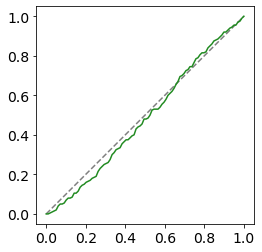

{'area_above': 0.005036034425127357,
 'area_below': 0.021207851909566037,
 'total_area': 0.026243886334693392}

In [8]:
p_hat_list = p_vals_k5
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

plt.gca().set_aspect('equal', adjustable='box')

# set ticks bigger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig(f"SBM_knnBootstrap_k{k}_M{M}_SYMM.png", facecolor="white")

plt.show()

compute_roc_and_areas(p_vals_k5, significance_level=0.05)

#### ASE-kNN k=25

In [9]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

k=25

p_vals_k25 = []
A_boots_list_k25 = []

for m in A_true_draws:
    p_val, A_boots = create_single_kNN_bootstrap(m, d=d, Q=1000, n_neighbors=k)
    p_vals_k25.append(p_val)
    A_boots_list_k25.append(A_boots)

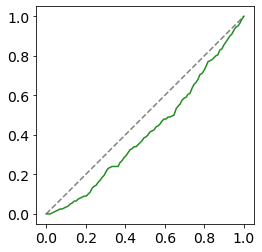

{'area_above': 0.0,
 'area_below': 0.08484287317620655,
 'total_area': 0.08484287317620655}

In [10]:
p_hat_list = p_vals_k25
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

plt.gca().set_aspect('equal', adjustable='box')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig(f"SBM_knnBootstrap_k{k}_M{M}_SYMM.png", facecolor="white")

plt.show()

compute_roc_and_areas(p_vals_k25, significance_level=0.05)

#### ASE-kNN k=55

In [11]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

k=55

p_vals_k55 = []
A_boots_list_k55 = []

for m in A_true_draws:
    p_val, A_boots = create_single_kNN_bootstrap(m, d=d, Q=1000, n_neighbors=k)
    p_vals_k55.append(p_val)
    A_boots_list_k55.append(A_boots)

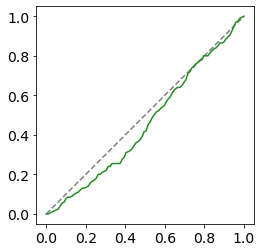

{'area_above': 0.0003492170969979298,
 'area_below': 0.0441560625470431,
 'total_area': 0.04450527964404103}

In [12]:
p_hat_list = p_vals_k55
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

plt.gca().set_aspect('equal', adjustable='box')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig(f"SBM_knnBootstrap_k{k}_M{M}_SYMM.png", facecolor="white")
plt.show()

compute_roc_and_areas(p_vals_k55, significance_level=0.05)

#### ASE-kNN k=90

In [13]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

k=90

p_vals_k90 = []
A_boots_list_k90 = []

for m in A_true_draws:
    p_val, A_boots = create_single_kNN_bootstrap(m, d=d, Q=1000, n_neighbors=k)
    p_vals_k90.append(p_val)
    A_boots_list_k90.append(A_boots)

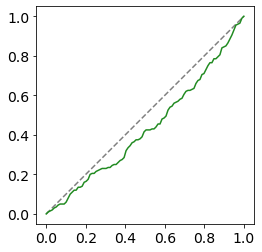

{'area_above': 7.183352760336341e-07,
 'area_below': 0.0649113438228835,
 'total_area': 0.06491206215815953}

In [14]:
p_hat_list = p_vals_k90
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

plt.gca().set_aspect('equal', adjustable='box')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig(f"SBM_knnBootstrap_k{k}_M{M}_SYMM.png", facecolor="white")
plt.show()

compute_roc_and_areas(p_vals_k90, significance_level=0.05)

#### ASE-$YY^T$

In [15]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

p_vals_YYT = []
A_boots_list_YYT = []

for m in A_true_draws:
    p_val, A_boots = create_single_YYT_bootstrap_cropPto0_1range(m,d=d,Q=1000)
    p_vals_YYT.append(p_val)
    A_boots_list_YYT.append(A_boots)

/home/uj21900/Documents/ValidBootstrapsForNetworks/functions_for_bootstrap.py:192: UserWarning: P_hat contains values outside of [0,1]. The values outside this range will be clipped to lie in the range.
  warnings.warn("P_hat contains values outside of [0,1]. The values outside this range will be clipped to lie in the range.")


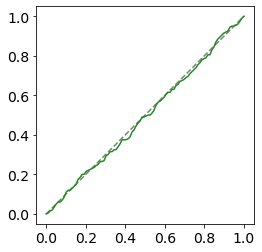

{'area_above': 0.002334186850307647,
 'area_below': 0.008622982022380073,
 'total_area': 0.01095716887268772}

In [16]:
p_hat_list = p_vals_YYT
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.gca().set_aspect('equal', adjustable='box')

# plt.savefig(f"figs/SBM_YYTbootstrap_M{M}_SYMM.png")
plt.show()

compute_roc_and_areas(p_vals_YYT, significance_level=0.05)

#### ASE-Sample edgelist with replacement bootstrap for each draw from the model

This is essentially just dropping some edges, as any edge selected more than once is set to a 1 as this is a binary setting

In [17]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

p_vals_ESWR = []
A_boots_list = []

Q=1000 # number of sims to do in the paired exch test

for m in A_true_draws:
    A_boots = edgelist_sample_with_replacement(m) 
    # embed the observed and bootstrapped matrix together
    yhat_est = UASE([m, A_boots], d=d)
    # do a test between the obs and the bootstrap, get a p-value ---------------------------------
    p_val = test_temporal_displacement_two_times(yhat_est, n=m.shape[0], n_sim=Q) 

    p_vals_ESWR.append(p_val)
    A_boots_list.append(A_boots[0])

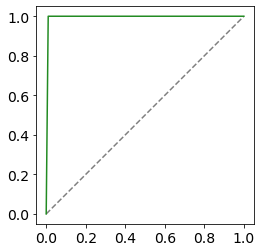

{'area_above': 0.4999489847974696,
 'area_below': 0.0,
 'total_area': 0.4999489847974696}

In [18]:
p_hat_list = p_vals_ESWR
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

plt.gca().set_aspect('equal', adjustable='box')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig(f"figs/SBM_edgelistSampleRepBootstrap_M{M}_SYMM.png")
plt.show()

compute_roc_and_areas(p_vals_ESWR, significance_level=0.05)

#### ASE-edgelist sample with replacement then rand sample edges

In [19]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

p_vals_ESWR_plusRand = []
A_boots_list = []

Q=1000 # number of sims to do in the paired exch test

for m in A_true_draws:
    A_boots = edgelist_sample_with_replacement_addRandomEdges(m) 
    # embed the observed and bootstrapped matrix together
    yhat_est = UASE([m, A_boots], d=d)
    # do a test between the obs and the bootstrap, get a p-value ---------------------------------
    p_val = test_temporal_displacement_two_times(yhat_est, n=m.shape[0], n_sim=Q) 

    p_vals_ESWR_plusRand.append(p_val)
    A_boots_list.append(A_boots[0])

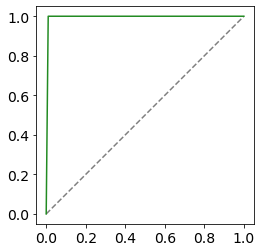

{'area_above': 0.4999489847974696,
 'area_below': 0.0,
 'total_area': 0.4999489847974696}

In [20]:
p_hat_list = p_vals_ESWR_plusRand
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

plt.gca().set_aspect('equal', adjustable='box')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig(f"figs/SBM_edgelistSampleRepBootstrap_edgesAdded_M{M}_SYMM.png")
plt.show()

compute_roc_and_areas(p_vals_ESWR_plusRand, significance_level=0.05)

### ProNE-kNN d=3

#### ProNE-kNN with k=5

In [21]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

p_vals_prone_k5_d3 = []
A_boots_list = []

k=5
Q=1000 # number of sims to do in the paired exch test

for m in A_true_draws:
    _, A_boots = create_single_kNN_prone_bootstrap(m, d=d, Q=Q, n_neighbors=k) 

    # embed the observed and bootstrapped matrix together
    yhat_est = UASE([m, A_boots], d=d)
    # do a test between the obs and the bootstrap, get a p-value ---------------------------------
    p_val = test_temporal_displacement_two_times(yhat_est, n=m.shape[0], n_sim=Q) 

    p_vals_prone_k5_d3.append(p_val)
    A_boots_list.append(A_boots[0])

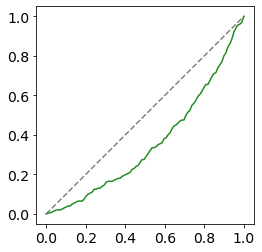

{'area_above': 0.0,
 'area_below': 0.1428206305479033,
 'total_area': 0.1428206305479033}

In [22]:
p_hat_list = p_vals_prone_k5_d3
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

plt.gca().set_aspect('equal', adjustable='box')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig(f"figs/SBM_knnProneResample_k{k}_M{M}_d{d}SYMM.png")
plt.show()

compute_roc_and_areas(p_vals_prone_k5_d3, significance_level=0.05)

#### ProNE-kNN k=25

In [23]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

p_vals_prone_k25_d3 = []
A_boots_list = []

k=25
Q=1000 # number of sims to do in the paired exch test

for m in A_true_draws:
    _, A_boots = create_single_kNN_prone_bootstrap(m, d=d, Q=Q, n_neighbors=k) 

    # embed the observed and bootstrapped matrix together
    yhat_est = UASE([m, A_boots], d=d)
    # do a test between the obs and the bootstrap, get a p-value ---------------------------------
    p_val = test_temporal_displacement_two_times(yhat_est, n=m.shape[0], n_sim=Q) 

    p_vals_prone_k25_d3.append(p_val)
    A_boots_list.append(A_boots[0])

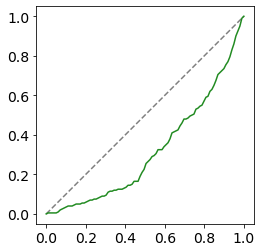

{'area_above': 6.402665570099559e-07,
 'area_below': 0.18106252428375175,
 'total_area': 0.18106316455030877}

In [24]:
p_hat_list = p_vals_prone_k25_d3
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

plt.gca().set_aspect('equal', adjustable='box')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig(f"figs/SBM_knnProneResample_k{k}_M{M}_d{d}SYMM.png")
plt.show()

compute_roc_and_areas(p_vals_prone_k25_d3, significance_level=0.05)

#### ProNE-kNN with k=55

In [25]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

p_vals_prone_k55_d3 = []
A_boots_list = []

k=25
Q=1000 # number of sims to do in the paired exch test

for m in A_true_draws:
    _, A_boots = create_single_kNN_prone_bootstrap(m, d=d, Q=Q, n_neighbors=k) 

    # embed the observed and bootstrapped matrix together
    yhat_est = UASE([m, A_boots], d=d)
    # do a test between the obs and the bootstrap, get a p-value ---------------------------------
    p_val = test_temporal_displacement_two_times(yhat_est, n=m.shape[0], n_sim=Q) 

    p_vals_prone_k55_d3.append(p_val)
    A_boots_list.append(A_boots[0])

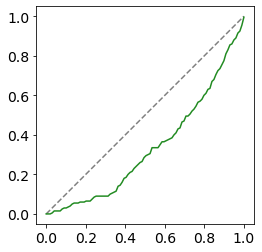

{'area_above': 0.0,
 'area_below': 0.16364988266503425,
 'total_area': 0.16364988266503425}

In [26]:
p_hat_list = p_vals_prone_k55_d3
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

plt.gca().set_aspect('equal', adjustable='box')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig(f"figs/SBM_knnProneResample_k{k}_M{M}_d{d}SYMM.png")
plt.show()

compute_roc_and_areas(p_vals_prone_k55_d3, significance_level=0.05)

#### ProNE-kNN k=90

In [27]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

p_vals_prone_k90_d3 = []
A_boots_list = []

k=90
Q=1000 # number of sims to do in the paired exch test

for m in A_true_draws:
    _, A_boots = create_single_kNN_prone_bootstrap(m, d=d, Q=Q, n_neighbors=k) 

    # embed the observed and bootstrapped matrix together
    yhat_est = UASE([m, A_boots], d=d)
    # do a test between the obs and the bootstrap, get a p-value ---------------------------------
    p_val = test_temporal_displacement_two_times(yhat_est, n=m.shape[0], n_sim=Q) 

    p_vals_prone_k90_d3.append(p_val)
    A_boots_list.append(A_boots[0])

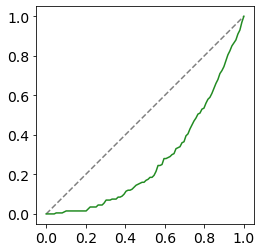

{'area_above': 0.0,
 'area_below': 0.219731149882665,
 'total_area': 0.219731149882665}

In [28]:
p_hat_list = p_vals_prone_k90_d3
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

plt.gca().set_aspect('equal', adjustable='box')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig(f"figs/SBM_knnProneResample_k{k}_M{M}_d{d}SYMM.png")
plt.show()

compute_roc_and_areas(p_vals_prone_k90_d3, significance_level=0.05)

### ProNE-kNN with d=2

In [29]:
d=2
# FOR KNN PRONE ONLY

#### ProNE-kNN k=5

In [30]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

p_vals_prone_k5 = []
A_boots_list = []

k=5
Q=1000 # number of sims to do in the paired exch test

for m in A_true_draws:
    _, A_boots = create_single_kNN_prone_bootstrap(m, d=d, Q=Q, n_neighbors=k) 

    # embed the observed and bootstrapped matrix together
    yhat_est = UASE([m, A_boots], d=d)
    # do a test between the obs and the bootstrap, get a p-value ---------------------------------
    p_val = test_temporal_displacement_two_times(yhat_est, n=m.shape[0], n_sim=Q) 

    p_vals_prone_k5.append(p_val)
    A_boots_list.append(A_boots[0])

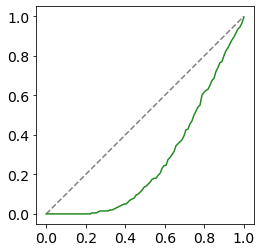

{'area_above': 0.0,
 'area_below': 0.22465539230690756,
 'total_area': 0.22465539230690756}

In [31]:
p_hat_list = p_vals_prone_k5
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

plt.gca().set_aspect('equal', adjustable='box')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig(f"figs/SBM_knnProneResample_k{k}_M{M}_SYMM_d{d}.png")
plt.show()

compute_roc_and_areas(p_vals_prone_k5, significance_level=0.05)

#### ProNE-kNN k=25

In [32]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

p_vals_prone_k25 = []
A_boots_list = []

k=25
Q=1000 # number of sims to do in the paired exch test

for m in A_true_draws:
    _, A_boots = create_single_kNN_prone_bootstrap(m, d=d, Q=Q, n_neighbors=k) 

    # embed the observed and bootstrapped matrix together
    yhat_est = UASE([m, A_boots], d=d)
    # do a test between the obs and the bootstrap, get a p-value ---------------------------------
    p_val = test_temporal_displacement_two_times(yhat_est, n=m.shape[0], n_sim=Q) 

    p_vals_prone_k25.append(p_val)
    A_boots_list.append(A_boots[0])

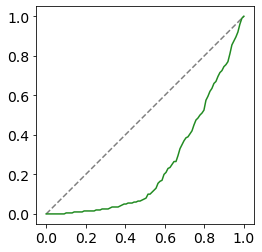

{'area_above': 6.836380675786635e-07,
 'area_below': 0.24686784348604576,
 'total_area': 0.24686852712411333}

In [33]:
p_hat_list = p_vals_prone_k25
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

plt.gca().set_aspect('equal', adjustable='box')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig(f"figs/SBM_knnProneResample_k{k}_M{M}_SYMM_d{d}.png")
plt.show()

compute_roc_and_areas(p_vals_prone_k25, significance_level=0.05)

#### ProNE-kNN k=55

In [34]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

p_vals_prone_k55 = []
A_boots_list = []

k=55
Q=1000 # number of sims to do in the paired exch test

for m in A_true_draws:
    _, A_boots = create_single_kNN_prone_bootstrap(m, d=d, Q=Q, n_neighbors=k) 

    # embed the observed and bootstrapped matrix together
    yhat_est = UASE([m, A_boots], d=d)
    # do a test between the obs and the bootstrap, get a p-value ---------------------------------
    p_val = test_temporal_displacement_two_times(yhat_est, n=m.shape[0], n_sim=Q) 

    p_vals_prone_k55.append(p_val)
    A_boots_list.append(A_boots[0])

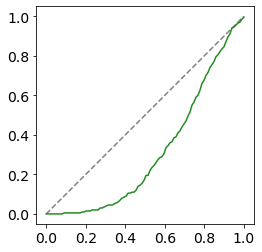

{'area_above': 7.214271064897702e-07,
 'area_below': 0.1856416312566196,
 'total_area': 0.1856423526837261}

In [35]:
p_hat_list = p_vals_prone_k55
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

plt.gca().set_aspect('equal', adjustable='box')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig(f"figs/SBM_knnProneResample_k{k}_M{M}_SYMM_d{d}.png")
plt.show()

compute_roc_and_areas(p_vals_prone_k55, significance_level=0.05)

#### ProNE-kNN k=90

In [36]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

p_vals_prone_k90 = []
A_boots_list = []

k=90
Q=1000 # number of sims to do in the paired exch test

for m in A_true_draws:
    _, A_boots = create_single_kNN_prone_bootstrap(m, d=d, Q=Q, n_neighbors=k) 

    # embed the observed and bootstrapped matrix together
    yhat_est = UASE([m, A_boots], d=d)
    # do a test between the obs and the bootstrap, get a p-value ---------------------------------
    p_val = test_temporal_displacement_two_times(yhat_est, n=m.shape[0], n_sim=Q) 

    p_vals_prone_k90.append(p_val)
    A_boots_list.append(A_boots[0])

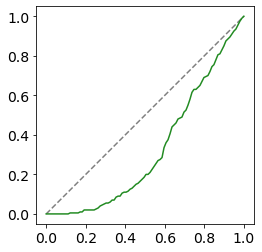

{'area_above': 8.57124109853511e-07,
 'area_below': 0.1726980377526241,
 'total_area': 0.17269889487673395}

In [37]:
p_hat_list = p_vals_prone_k90
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

plt.gca().set_aspect('equal', adjustable='box')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig(f"figs/SBM_knnProneResample_k{k}_M{M}_SYMM_d{d}.png")
plt.show()

compute_roc_and_areas(p_vals_prone_k90, significance_level=0.05)

#### all on one plot

In [ ]:
p_list_allnames = [p_vals_k5, p_vals_k25,p_vals_k55, p_vals_k90, 
                   p_vals_YYT, p_vals_ESWR, 
                   p_vals_prone_k5, p_vals_prone_k25, p_vals_prone_k55, p_vals_prone_k90,
                   p_vals_prone_k5_d3, p_vals_prone_k25_d3,p_vals_prone_k55_d3, p_vals_prone_k90_d3] #p_vals_ESWR_plusRand

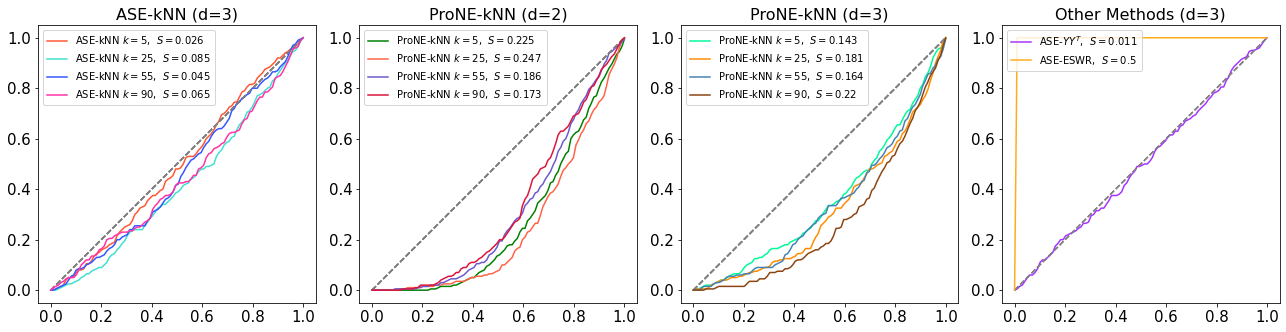

In [51]:
colors = ['#FF5733', '#40E0D0', '#3357FF', '#FF33A6', '#A633FF', '#FFAC1C', 'g', '#FF6347', '#6A5ACD', '#DC143C', '#00FA9A', '#FF8C00', '#4682B4', '#8B4513']  
labels = ['ASE-kNN $k=5$', 'ASE-kNN $k=25$', 'ASE-kNN $k=55$', 'ASE-kNN $k=90$', 'ASE-$YY^T$', 'ASE-ESWR', 'ProNE-kNN $k=5$', 'ProNE-kNN $k=25$','ProNE-kNN $k=55$', 'ProNE-kNN $k=90$', 
          'ProNE-kNN $k=5$', 'ProNE-kNN $k=25$', 'ProNE-kNN $k=55$','ProNE-kNN $k=90$']

fig, axs = plt.subplots(1, 4, figsize=(18,10))

# Define the indices for each panel
ase_knn_indices = [0, 1, 2, 3]
prone_knn_indices = [6, 7, 8, 9]
prone_knn_indices_d3 = [10, 11, 12, 13]
other_indices = [4, 5]

# Plot ASE-kNN
plot_roc(axs[0], ase_knn_indices, "ASE-kNN (d=3)")

# Plot ProNE-kNN
plot_roc(axs[1], prone_knn_indices, "ProNE-kNN (d=2)")

# Plot ProNE-kNN d=3
plot_roc(axs[2], prone_knn_indices_d3, "ProNE-kNN (d=3)")

# Plot other methods
plot_roc(axs[3], other_indices, "Other Methods (d=3)")

plt.tight_layout()
# plt.savefig(f"SBM_allMethods_M{M}_SYMM_3plots_different_d.png", facecolor="white", bbox_inches='tight')
plt.show()